## Imports

In [2]:
from IPython.display import Image, display

## Recap

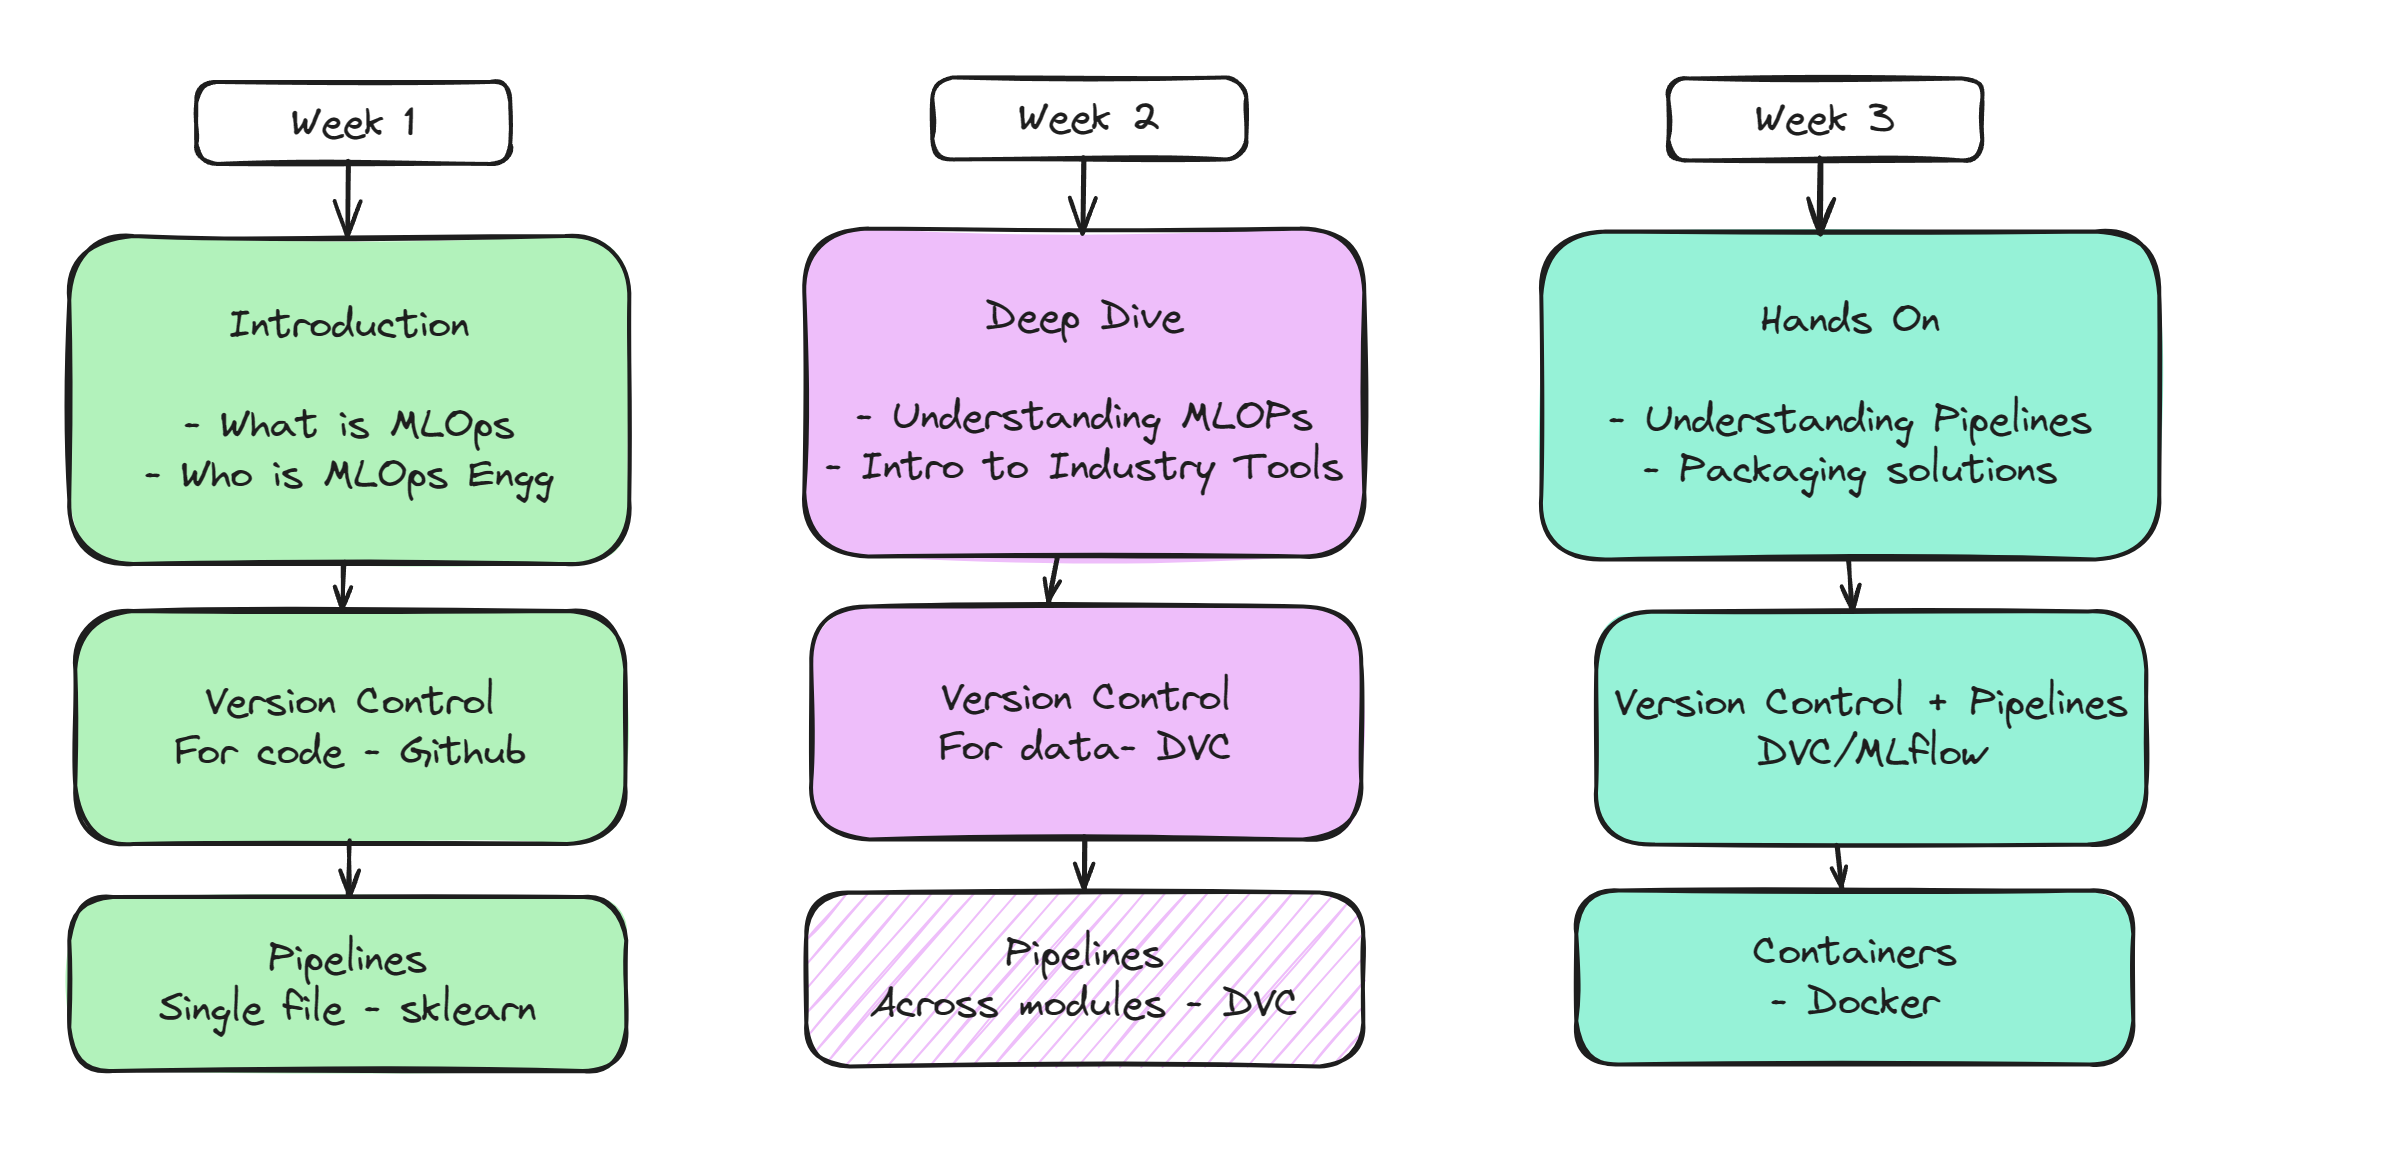

In [3]:
file='../img/week_3_recap.png'
display(Image(filename=file, embed=True, width=1000, height=1000))

**BONUS ALERT**
Below commands will make your life easier with terminals. Understand and memorize them as soon as you can.

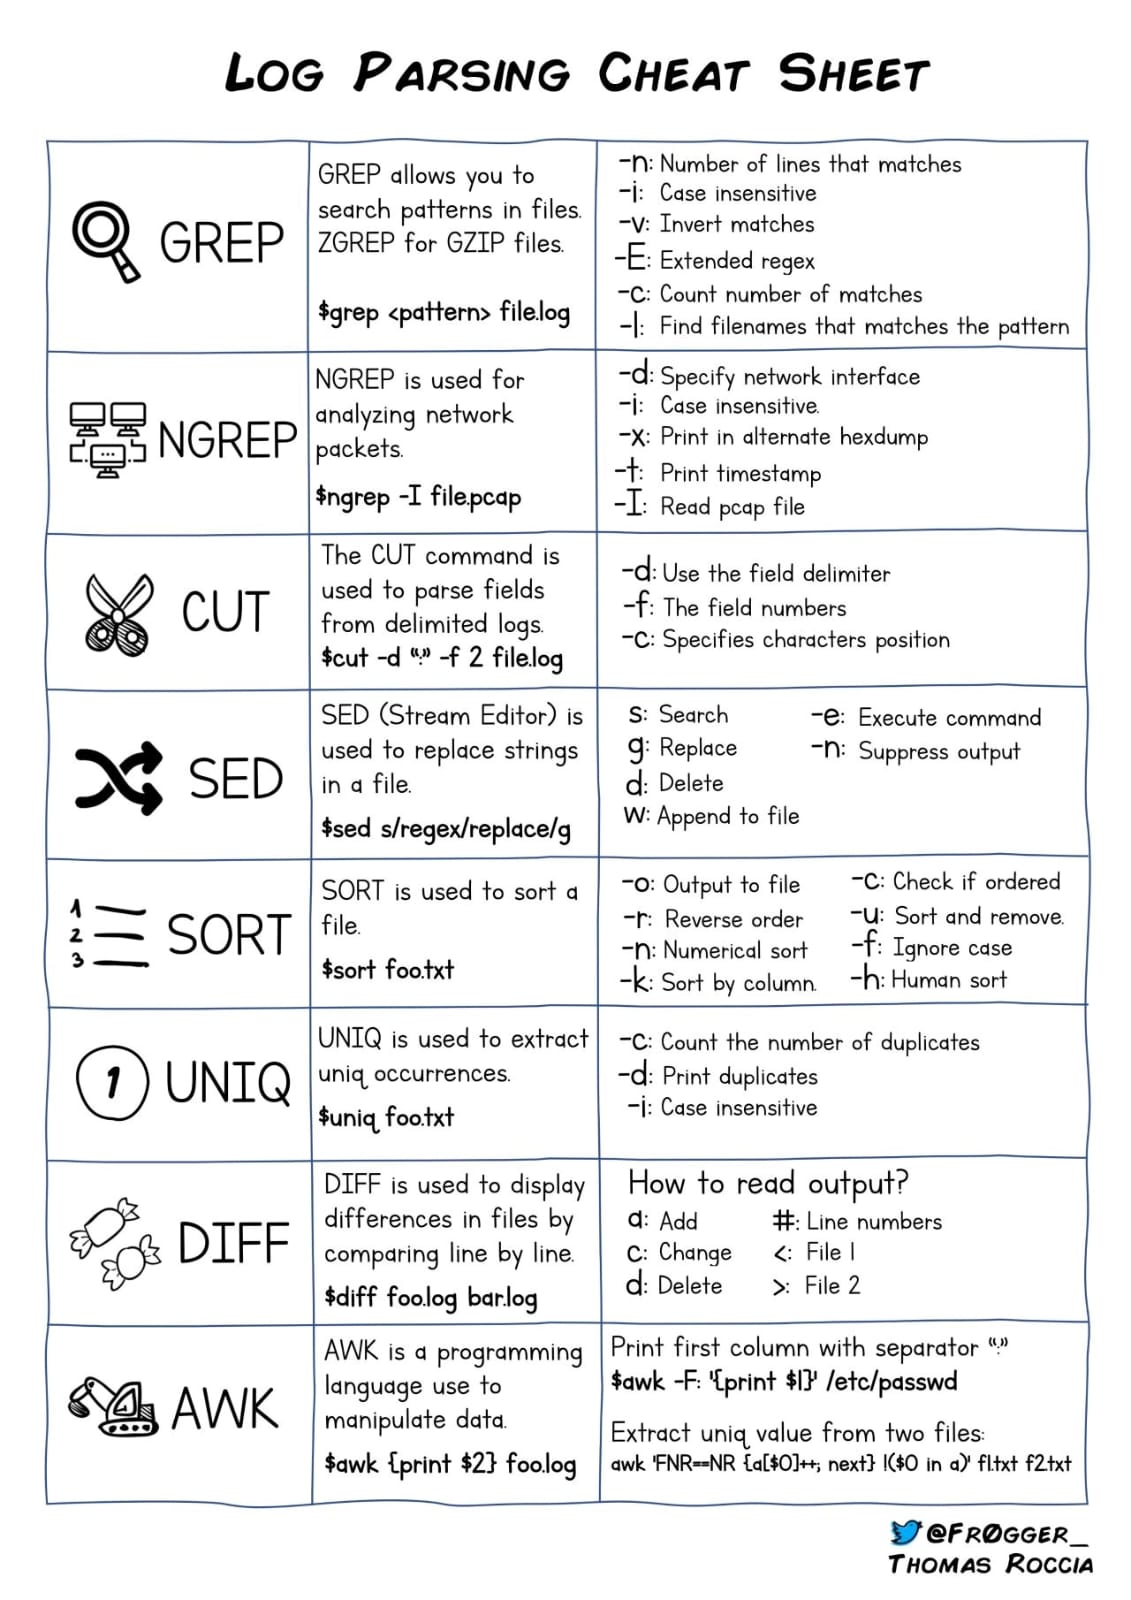

In [9]:
file='../img/unix_commands.jpg'
display(Image(filename=file, embed=True, width=1000, height=1000))

## Pipelines

Let's build a dummy example first and explore what DVC pipelines are and how data versioning works along side it. Then we will extend a cookicutter pipeline into a proper project that is using DVC to version the data layer and dvc pipelines to track experiments and plots.

Let's also replicate the same dummy pipeline with MLFlow so that you can understand that experimentation tracking is an outcome of pipeline. You can track your data and pipeline with DVC while you can log the experimentation details and artefacts in MLflwo or DVC. MLFlow is a better choice and is used everywhere in the industry either in a self-managed setup or via DataBricks.

## Pipelines + DVC + Experimentation Tracking

Demo - [CreditCard Project Repo](https://github.com/PranY/creditcard)

## Assignment [Rookie]

Clone the project discussed above and replace the tracking layer from DVC to MLFlow and verify that both are similar in behaviour. Also, try to use more features of MLFlow while you explore the tool. Use it with VS Code to leverage the IDE capabilities as it will help you expand your understanding of the tool. 

## Assignment [Moderate]

This is a moderate level assignment that will test your understanding of all the tools and technologies we have covered so far in the course.

### ToDos
- Create a new project using cookiecutter and use [NYC Taxi Kaggle competition](https://www.kaggle.com/competitions/nyc-taxi-trip-duration)
- Analyse the data to find interesting patterns and log the plots and artefacts with DVC. Do this activity incrementally and record observations across commits and versions
- Build a model pipeline to predict the trip duration as mentioned on the competition page. You can use other's notebooks for ideas in EDA and modeling

## Zooming Out

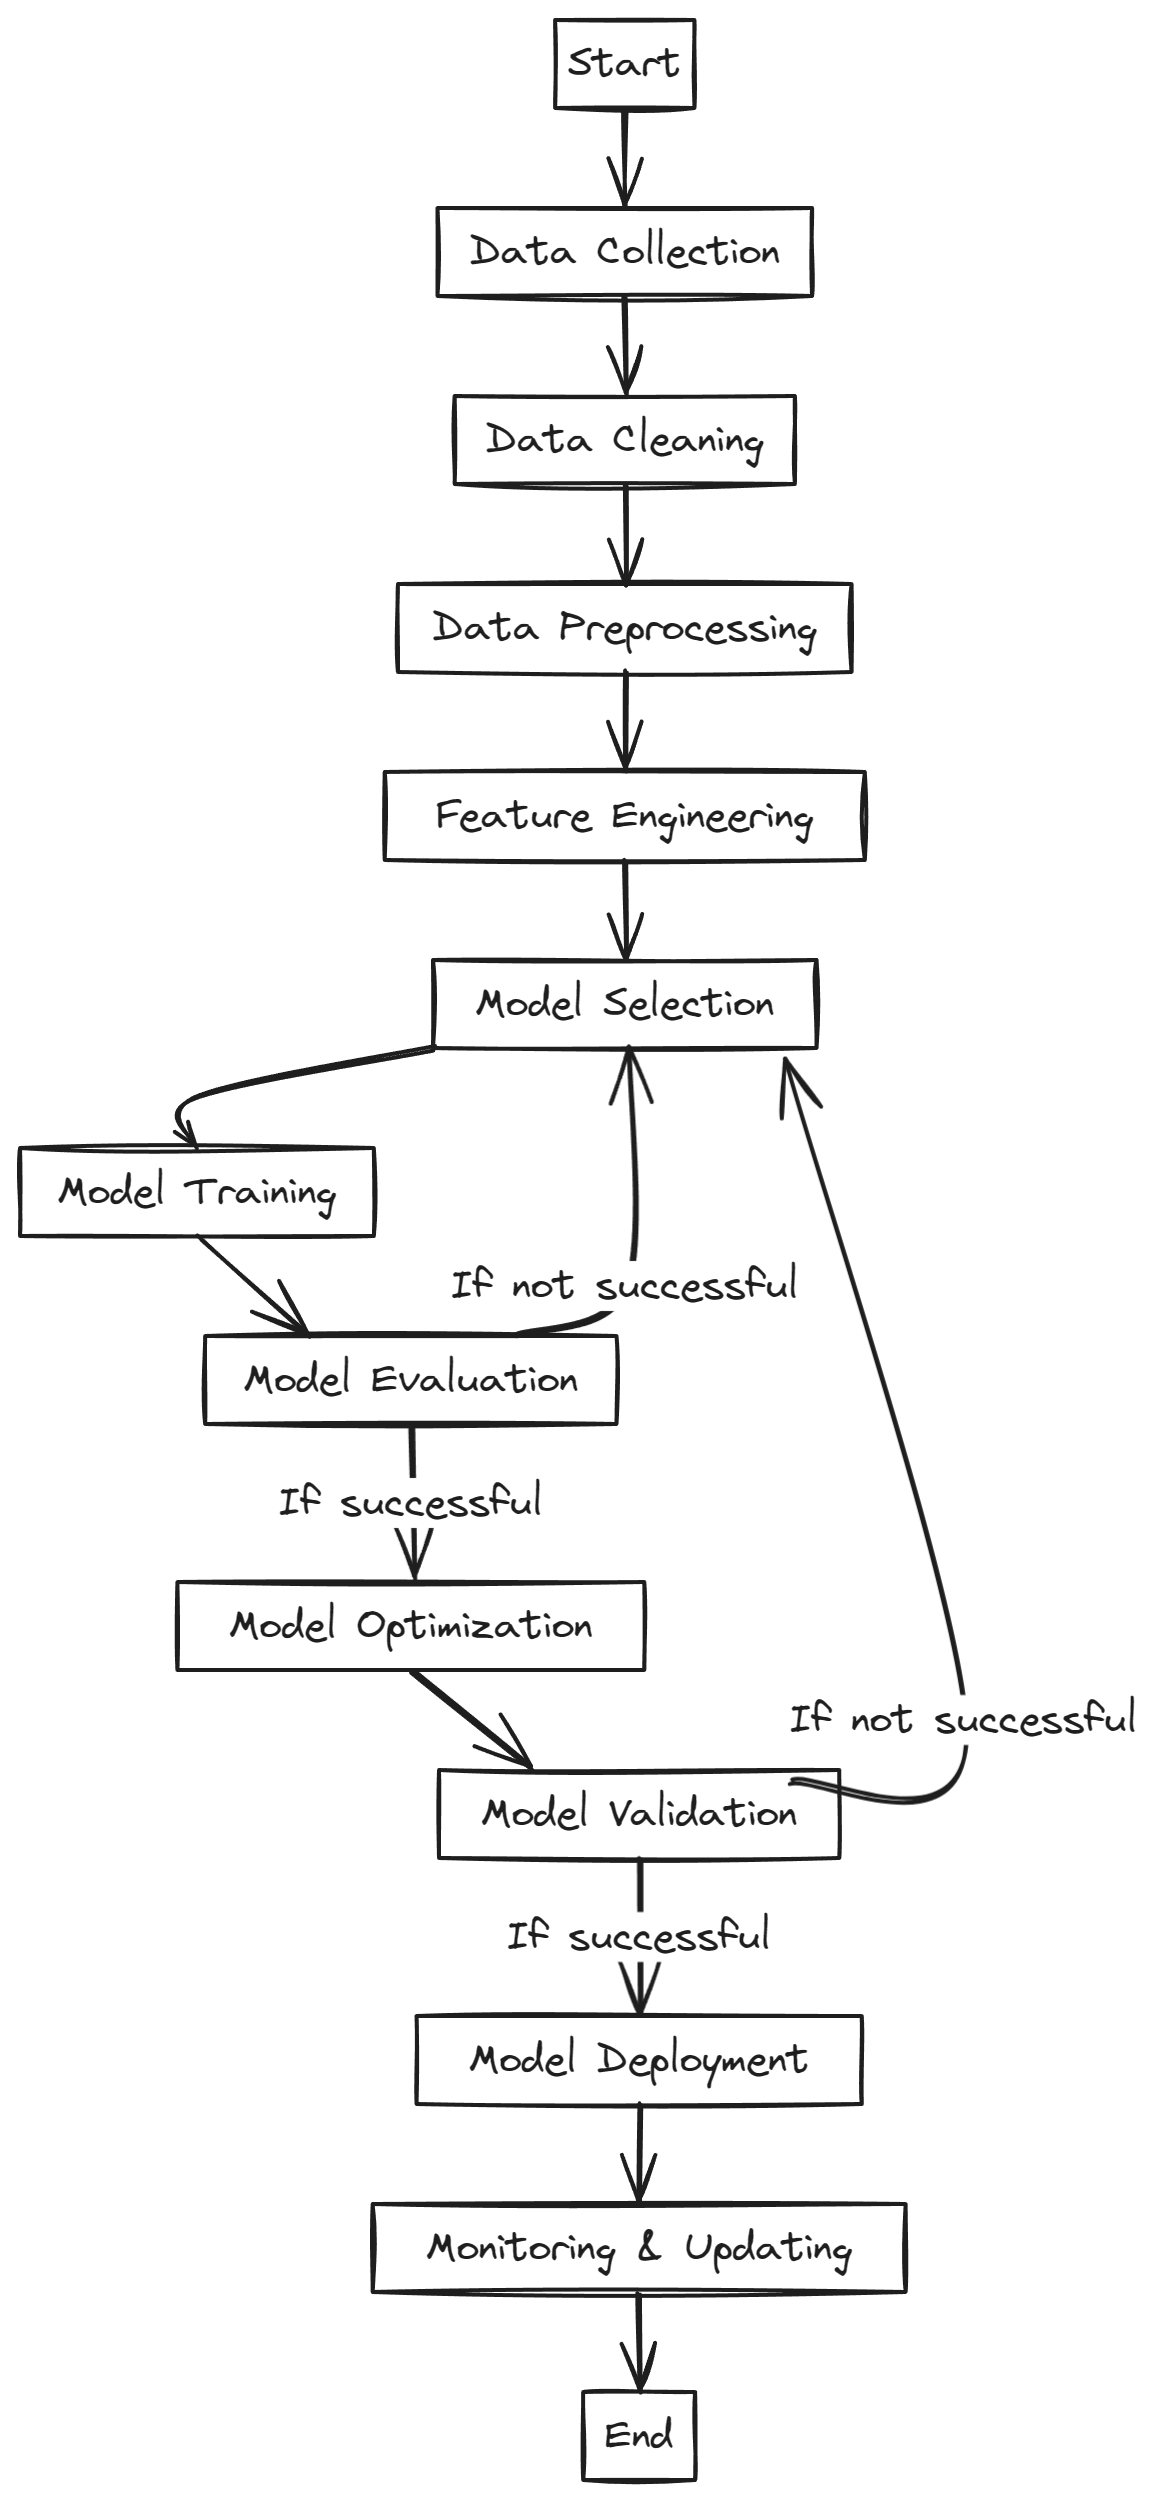

In [5]:
file='../img/ML-DLC-zoomout.jpg'
display(Image(filename=file, embed=True, width=700, height=700))

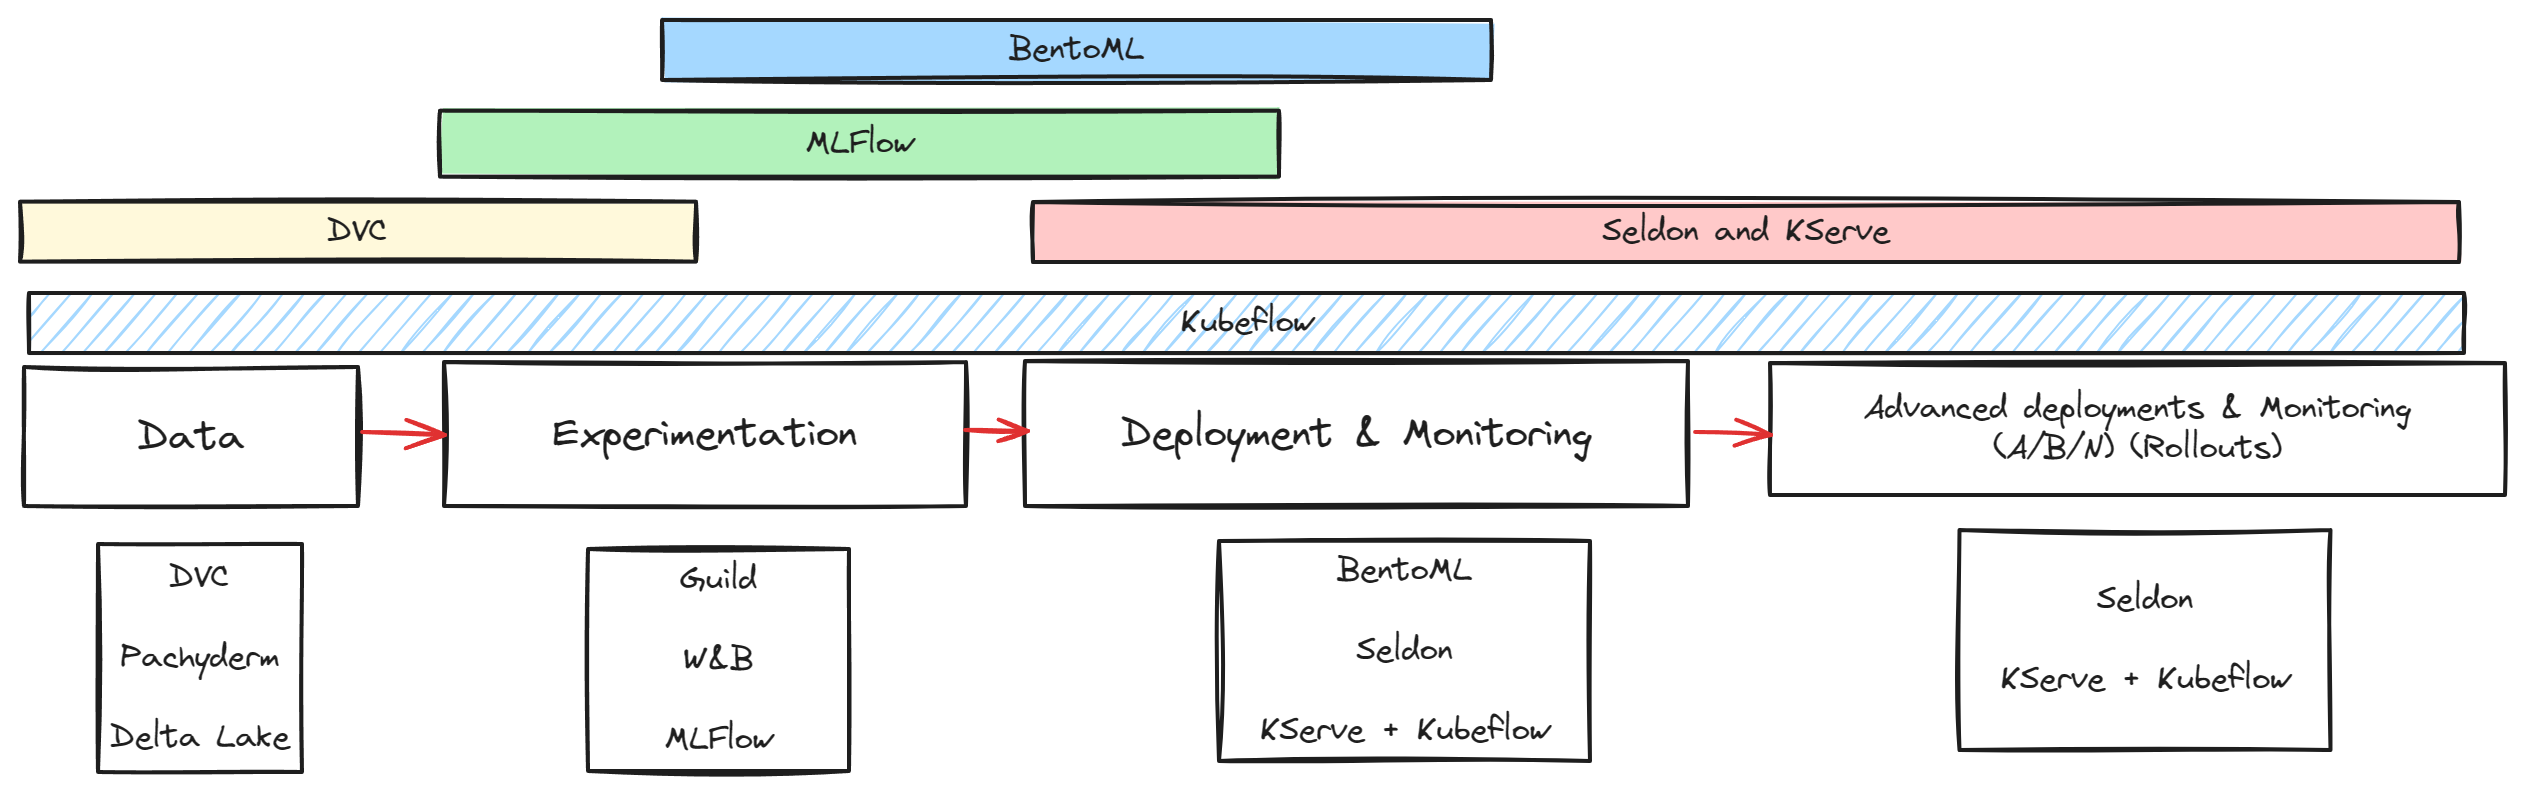

In [10]:
file='../img/tools-overlap.png'
display(Image(filename=file, embed=True, width=1000, height=1000))

[BentoML vs Seldon vs KServe](https://getindata.com/blog/machine-learning-model-serving-tools-comaprison-kserve-seldon-core-bentoml/)

Explain ZenML as the connector layer

DVC (Data Version Control), MLflow, and ZenML are tools designed to help manage and streamline various aspects of the machine learning (ML) workflow, but they serve different purposes. Let's explore each one and highlight their key differences.

#### DVC (Data Version Control):

Purpose:
- DVC is primarily focused on version controlling and managing large files, particularly datasets. It allows you to track changes in your data files, collaborate with others, and reproduce experiments with the exact dataset used during model development.

Key Features:

- Version control for data files.
- Dependency tracking for code and data.
- Integration with Git.

Example Code:
```
# Initialize a DVC project
dvc init

# Add data file to DVC
dvc add data.csv

# Commit changes to Git and DVC
git add .
git commit -m "Add data file and DVC configuration"

# Push changes to a remote repository
git push
dvc push

```

#### MLflow:

Purpose:
- MLflow is a comprehensive platform for managing the end-to-end machine learning lifecycle. It supports experiment tracking, packaging code into reproducible runs, and sharing and deploying models.

Key Features:
- Experiment tracking.
- Packaging code into reproducible runs.
- Model registry for managing and versioning models.
- Deployment tools.

Example Code:

```
import mlflow
import mlflow.sklearn

# Start MLflow run
with mlflow.start_run():
    # Train your model
    model = train_model()

    # Log parameters, metrics, and the model
    mlflow.log_param("param_name", param_value)
    mlflow.log_metric("metric_name", metric_value)
    mlflow.sklearn.log_model(model, "model")

# View the results in the MLflow Server
mlflow serve

```

#### ZenML:

Purpose:
- ZenML is a framework-agnostic tool focused on managing and versioning machine learning pipelines. It emphasizes modular, reusable components for building, testing, and sharing ML workflows.

Key Features:
- Pipeline versioning.
- Experiment tracking.
- Configurable and modular pipeline components.
- Integration with Git.

Example Code:
```
# Initialize a ZenML project
zenml init my_project

# Define a pipeline with configurable components
@zenml.component
def preprocess(data):
    # Preprocessing logic
    return preprocessed_data

@zenml.component
def train(preprocessed_data, hyperparameters):
    # Training logic
    return trained_model

# Define a pipeline with the configured components
@zenml.pipeline
def my_pipeline():
    data = zenml.data.SimpleCSVData(data_path="path/to/data")
    preprocessed_data = preprocess(data)
    trained_model = train(preprocessed_data, hyperparameters)

# Run the pipeline
my_pipeline.run()

```

#### Key Differences:
- Focus:
    - DVC: Focuses on version controlling and managing large data files.
    - MLflow: Provides end-to-end lifecycle management with a focus on experiment tracking, model packaging, and deployment.
    - ZenML: Emphasizes pipeline versioning and modular, configurable components.
- Use Cases:
    - DVC: Best suited for data versioning and collaboration.
    - MLflow: Suitable for managing the entire ML lifecycle, from experimentation to production deployment.
    - ZenML: Ideal for creating and versioning modular ML pipelines with configurable components.
- Integration:
    - DVC: Integrates with Git for version control.
    - MLflow: Offers integration with various ML frameworks and tools.
    - ZenML: Integrates with Git and allows flexible integration with various ML frameworks.

## Philosophy behind CI/CD for Machine Learning

### 1. Automation

CI/CD emphasizes automation in the software development and machine learning lifecycle. Automation reduces manual errors, accelerates development, and ensures consistency.

### 2. Continuous Integration (CI)

CI involves regularly merging code changes into a shared repository. For ML, this means integrating new models, datasets, or code changes into the project repository to trigger automated testing.

### 3. Continuous Delivery/Deployment (CD)

CD extends CI by automatically delivering or deploying the integrated code to production. In ML, this could involve deploying updated models or datasets to a production environment.

### 4. Version Control

Version control, such as Git, is fundamental. DVC extends version control to handle large files and datasets efficiently, ensuring reproducibility and traceability in ML projects.

### 5. Experiment Tracking

Tracking experiments is crucial for understanding model performance and changes over time. Tools like MLflow or TensorBoard can be integrated into the CI/CD pipeline to monitor and log experiments.

### 6. Collaboration

CI/CD encourages collaboration by providing a centralized platform (e.g., GitHub) where team members can contribute, review, and track changes.

## CI/CD Tutorial Outline

### 1. Setting up GitHub Actions for CI/CD

#### Introduction to GitHub Actions

Explain the concept of workflows and how they define automation.

[Github Actions 5min walkthrough](https://docs.github.com/en/actions/quickstart)

#### Workflow file

```yaml
# .github/workflows/ci_cd.yml

name: CI Pipeline

on:
  push:

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout Repository
      uses: actions/checkout@v3

    - name: Set up Python
      uses: actions/setup-python@v4
      with:
        python-version: 3.11

    - name: Install Dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
    
    - name: Run main file
      run: |
        python main.py
    
    - name: Run Tests
      run: |
        python -m unittest discover

```

### 2. Integrating CML for Version Control

#### Integrating CML with GitHub Actions

CML helps you automatically train and evaluate machine learning models right in your pull/merge requests. It can also embed reports from the results, including plots and metrics.

```yaml
# .github/workflows/ci_cd.yml

name: CI Pipeline

on:
  push:

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout Repository
      uses: actions/checkout@v3

    - name: Set up Python
      uses: actions/setup-python@v4
      with:
        python-version: 3.11

    - name: Install Dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
    
    - name: Run main file
      run: |
        python main.py
    
    - name: Run Tests
      run: |
        python -m unittest discover
    
## Only CML specefic code

    - name: Create CML report
      env:
        REPO_TOKEN: ${{ secrets.GITHUB_TOKEN }}
      run: |

        echo "# First Line of our report" >> report.md
        echo "## Bar Plots" >> report.md
        echo '![](./bars.png "Bar plot")' >> report.md
        echo "## Line Plots" >> report.md
        echo '![](./lines.png "Bar plot")' >> report.md

        cml comment create report.md

```

## Containerization and Orchestration Philosophy

### Containerization

Containerization is a lightweight and efficient way to package, distribute, and run applications. It encapsulates an application and its dependencies into a single, standardized unit known as a container. Containers provide consistency across various environments, making it easier to develop, deploy, and scale applications.

Key aspects of containerization:
- **Isolation:** Containers encapsulate applications and their dependencies, ensuring isolation from the underlying system and other containers.
- **Portability:** Containers can run consistently across different environments, whether it's a developer's laptop, a testing environment, or a production server.
- **Resource Efficiency:** Containers share the host OS kernel, making them more lightweight than traditional virtual machines.

### Orchestration

Orchestration is the automated management, coordination, and deployment of multiple containers in a distributed environment. It addresses challenges such as scaling, load balancing, and service discovery.

Key aspects of orchestration:
- **Scaling:** Easily scale the number of containers to handle increased load or demand.
- **Service Discovery:** Automatically discover and connect containers to form a distributed application.
- **Load Balancing:** Distribute incoming traffic across multiple containers to ensure optimal performance and reliability.
- **Fault Tolerance:** Orchestration tools help in maintaining application availability by handling container failures and replacing them as needed.

### Docker Tutorial

#### Installing Docker

Before we start, make sure Docker is installed on your machine. You can download and install Docker from the [official website](https://www.docker.com/get-started).

#### Running Your First Container

Let's start by running a simple container. Open your terminal and execute the following command:

```bash
docker run hello-world
```

This command pulls the "hello-world" image from Docker Hub and runs it in a container. You should see a welcome message indicating that your installation is working.

#### Building Your Own Image

Now, let's create a simple web application and containerize it.

- Clone the sample application to use with this guide. Open a terminal, change directory to a directory that you want to work in, and run the following command to clone the repository

```bash
git clone https://github.com/docker/python-docker

```

- Go to `python-docker` and create or activate a python 3.11 environment:

```bash
# If you want to create a conda environment with python 3.11
conda create -n python311 python=3.11

# If you want to activate a conda environment with python 3.11
conda activate python311

## NOTE - It is a good practice to keep your environment name specific to python versions If needed, add project name.
## For example, python311-docker-test

```

- Now that you have an application, you can use `docker init` to create the necessary Docker assets to containerize your application. Inside the `python-docker` directory, run the `docker init` command. Refer to the following example to answer the prompts from `docker init`:

```bash
docker init
Welcome to the Docker Init CLI!

This utility will walk you through creating the following files with sensible defaults for your project:
  - .dockerignore
  - Dockerfile
  - compose.yaml

Let's get started!

? What application platform does your project use? Python
? What version of Python do you want to use? 3.11.4
? What port do you want your app to listen on? 5000
? What is the command to run your app? python3 -m flask run --host=0.0.0.0
```

#### Running Your Web Application Container


Inside the `python-docker` directory, run the following command in a terminal.
```bash
docker compose up --build

```

Visit http://localhost:PORT in your web browser, and you should see your "Hello, Docker!" web page.


Common gotchas:
- You need to use the port number that you set during question 3 of `docker init`.
- If you crate a a cond aenv with some python version that does not match your input for question 2, the application may not run.
- For question 4, if you are using `gunicorn` to run the application using the defaults, you need to add gunicorn in the requirements file.

## Asssignment [Multi-Container Applications with Docker Compose]

#### Creating a Multi-Container Application

Consider a scenario where you have a web application that communicates with a backend database. We'll create two containers, one for the web application and another for the database.

- Create a `docker-compose.yml` file:
```yaml
version: '3'
services:
  web:
    image: nginx:alpine
    ports:
      - "8080:80"
  db:
    image: mysql:5.7
    environment:
      MYSQL_ROOT_PASSWORD: example
      MYSQL_DATABASE: app_db
      MYSQL_USER: app_user
      MYSQL_PASSWORD: app_password

```

This `docker-compose.yml file` defines two services: `web` and `db`. The `web` service uses the Nginx image, while the `db` service uses the MySQL image. The `environment` section sets up MySQL with a root password and a database for our application.


- Run the multi-container application:
```bash
docker-compose up

```
This command starts both containers defined in the docker-compose.yml file.

#### Scaling with Docker Compose

Scaling is a crucial aspect of container orchestration. Docker Compose allows you to scale services easily.

- Update the `docker-compose.yml` file to include a service that can be scaled:

```yaml
version: '3'
services:
  web:
    image: nginx:alpine
    ports:
      - "8080:80"
  db:
    image: mysql:5.7
    environment:
      MYSQL_ROOT_PASSWORD: example
      MYSQL_DATABASE: app_db
      MYSQL_USER: app_user
      MYSQL_PASSWORD: app_password
  app_server:
    image: custom_app_image
    ports:
      - "5000:5000"

```

Here, we've added an `app_server` service. Replace `custom_app_image` with the actual image for your application server

- Scale the `app_server` service:

```bash
docker-compose up --scale app_server=3

```

This command scales the app_server service to three instances. You can adjust the number based on your requirements.